In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from keras.engine import  Model
from __future__ import absolute_import, division, print_function
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, MaxPooling2D,Flatten
import pickle
import glob
import matplotlib
from keras.models import *
from keras.layers import *
import keras.backend as K
from types import MethodType
from tqdm import tqdm
import random
import itertools
import copy
from sklearn.neighbors import DistanceMetric
from keras.layers.core import Lambda, Dense
import math
from sklearn.preprocessing import StandardScaler
from scipy import spatial
from skimage import color
from keras.preprocessing.image import ImageDataGenerator

Filenames to be separated into different directories for ImageDataGenerator

In [3]:
filenames=glob.glob('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/*')
filenames=sorted(filenames)
filenames=sorted(filenames,key=len)
filenames

['/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Colab Notebooks/Kaggle

List of all images

In [ ]:
from skimage import color
train=[]
for i in range(len(filenames)):
    img=Image.open(filenames[i])
    img=img.convert('RGB')
    img=img.resize(size=(224,224))
    img=np.array(img)
    train.append(img)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train.pkl', 'wb') as f:
    pickle.dump(train, f, pickle.HIGHEST_PROTOCOL)
# with open('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train_normalized.pkl', 'wb') as f:
#     pickle.dump([train,trainl], f, pickle.HIGHEST_PROTOCOL)

In [ ]:
def load_dict(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
# train,trainl=load_dict('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train_normalized.pkl')
train=load_dict('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/train.pkl')

List of labels

In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/labels.csv')

In [5]:
label_dict={}
labels=['beagle', 'chihuahua', 'doberman', 'french_bulldog', 'golden_retriever', 'malamute', 'pug', 'saint_bernard', 'scottish_deerhound', 'tibetan_mastiff', 'other']
for i in range(len(labels)):
  label_dict[labels[i]]=i

In [6]:
df=df.values

In [ ]:
df_dict={}
for i in df:
    df_dict[i[0]]=i[1]
train_data=[]
for i in range(len(filenames)):
    ret=filenames[i].split('/')[-1].split('.')[0]
    try:
        ret1=label_dict[df_dict[ret]]
    except:
        # continue
        ret1=label_dict['other']
    train_data.append([train[i],ret1])

Separate into train-test by 70:30 split

In [ ]:
random.shuffle(filenames)
train_names = filenames[:int(0.7*len(filenames))]
test_names = filenames[int(0.7*len(filenames)):]

Save images classwise in new folder for Keras ImageDataGenerator

In [ ]:
import shutil, os
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
for i in range(len(train_names)):
    print(i)
    ret=train_names[i].split('/')[-1].split('.')[0]
    try:
        ret1=df_dict[ret]
        img = load_img(train_names[i], target_size=(224, 224))
        img_array = img_to_array(img)
        img_ready = preprocess_input(img_array)
        cv.imwrite('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/data1/train/'+ret1+'/'+train_names[i].split('/')[-1],img_ready)
    except:
        continue

for i in range(len(test_names)):
    print(i)
    ret=test_names[i].split('/')[-1].split('.')[0]
    try:
        ret1=df_dict[ret]
        img = load_img(test_names[i], target_size=(224, 224))
        img_array = img_to_array(img)
        img_ready = preprocess_input(img_array)
        cv.imwrite('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/data1/test/'+ret1+'/'+test_names[i].split('/')[-1],img_ready)
    except:
        continue

Streaming output truncated to the last 5000 lines.
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411

Keras ImageDataGenerator with data augmentation

In [8]:
src_path_train = "/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/data1/train/"
src_path_test = "/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/data1/test/"

train_datagen = ImageDataGenerator(
        featurewise_center=True,
        samplewise_center=True,
        featurewise_std_normalization=True,
        samplewise_std_normalization=True,
        # rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator()#rescale=1 / 255.0)

In [9]:
batch_size = 16
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 484 images belonging to 10 classes.
Found 116 images belonging to 10 classes.
Found 241 images belonging to 10 classes.


Training a ResNet50 with top removed and 4 FC layers added. Using Imagenet weights helps in improving performance by ~17% compared to training a freshly initialized Resnet50, which overfits quickly. I froze the whole model except the last 4 layers, which are trained for 100 epochs using the augmented dataset. The results obtained work well only for 5 classes, which we increase to 8 by training the model for 20 epochs using the class weights shown in the code.

In [14]:
base_model = keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=None,
    pooling='avg'
)
for layer in base_model.layers:
    layer.trainable = False
x=tf.keras.layers.Dropout(.5)(base_model.output)
x=Dense(512)(x)
x=tf.keras.layers.Dropout(.5)(x)
x=Dense(256)(x)
x=tf.keras.layers.Dropout(.5)(x)
x=Dense(64)(x)
x=tf.keras.layers.Dropout(.5)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/mdl_wts1.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',metrics=['accuracy']
)
model.fit(
        train_generator,
        epochs=100,
        validation_data=valid_generator)#,callbacks=[mcp_save],class_weight={0:2,1:2,2:2,3:7,4:7,5:7,6:2,7:7,8:1,9:7})

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
31/31 [==============================] - 12s 295ms/step - loss: 0.3116 - accuracy: 0.3435 - val_loss: 0.2948 - val_accuracy: 0.3707
Epoch 2/100
31/31 [==============================] - 8s 268ms/step - loss: 0.3156 - accuracy: 0.3143 - val_loss: 0.2954 - val_accuracy: 0.3276
Epoch 3/100
31/31 [==============================] - 8s 272ms/step - loss: 0.3067 - accuracy: 0.3596 - val_loss: 0.3006 - val_accuracy: 0.3534
Epoch 4/100
31/31 [==============================] - 8s 269ms/step - loss: 0.3119 - accuracy: 0.3136 - val_loss: 0.2910 - val_accuracy: 0.3190
Epoch 5/100
31/31 [==============================] - 8s 277ms/step - loss: 0.3035 - accuracy: 0.3721 - val_loss: 0.2948 - val_accuracy: 0.2845
Epoch 6/100
31/31 [==============================] - 8s 272ms/step - loss: 0.2986 - accuracy: 0.3374 - val_loss: 0.2939 - val_accuracy: 0.3534
Epoch 7/100
31/31 [==============================] - 8s 270ms/step - loss: 0.2913 - accuracy: 0.3793 - val_loss: 0.2982 - val_accuracy: 0.301

In [13]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/Kaggle/dog-breed-identification/mdl_wts1.hdf5')

In [12]:
from sklearn import metrics
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                    precision    recall  f1-score   support

            beagle       0.33      0.18      0.23        28
         chihuahua       0.25      0.29      0.27        21
          doberman       0.31      0.15      0.21        26
    french_bulldog       0.00      0.00      0.00        15
  golden_retriever       0.23      0.52      0.32        25
          malamute       1.00      0.29      0.45        17
               pug       0.22      0.69      0.34        29
     saint_bernard       0.71      0.25      0.37        20
scottish_deerhound       0.55      0.40      0.46        40
   tibetan_mastiff       0.00      0.00      0.00        20

          accuracy                           0.31       241
         macro avg       0.36      0.28      0.26       241
      weighted avg       0.37      0.31      0.29       241



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
tg={}
for i in test_generator.class_indices:
    tg[test_generator.class_indices[i]]=i
tg

{0: 'beagle',
 1: 'chihuahua',
 2: 'doberman',
 3: 'french_bulldog',
 4: 'golden_retriever',
 5: 'malamute',
 6: 'pug',
 7: 'saint_bernard',
 8: 'scottish_deerhound',
 9: 'tibetan_mastiff'}

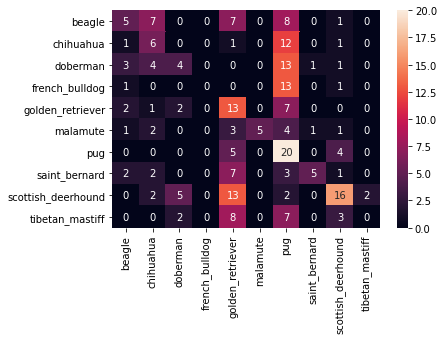

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
import pandas as pd
cm=confusion_matrix(true_classes, predicted_classes)
columns = [i for i in list(test_generator.class_indices.keys())]
import seaborn as sns
df_cm = pd.DataFrame(cm, index=columns, columns=columns)
sns.heatmap(df_cm,annot=True)

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(true_classes,predictions,multi_class='ovr'))
print(accuracy_score(true_classes,predicted_classes))

0.7020200920696644
0.25311203319502074


Locally Deploy app using dog_breed_app.ipynb. Test app using dog_breed_final_run.ipynb